# **Домашняя работа №2**

### `Петров Александр ИКБО-40-24`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Загрузка данных и первичный осмотр

In [2]:
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"

In [3]:
df = pd.read_csv(url)  # считываем информацию из csv-файла по url

df  # выводим загруженные данные

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [4]:
df.head()  # первые строки датафрейма (по умолчанию 5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [5]:
df.info()  # сводная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
df.describe()  # описательная статистика по столбцам

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### 2. Пропуски, дубликаты и базовый контроль качества

In [7]:
df.isna().mean()  # доля пропусков в столбцах

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [8]:
copy_df = df.copy()                             # создаем копию, чтобы изменения не отразились на оригинальном датафрейме
copy_df["duplicate"] = copy_df.duplicated()     # новый столбец для анализа дубликатов

copy_df  # удобно отображаем

,user_id,age,country,purchases,revenue,duplicate
0,1,25.0,FR,7,749,False
1,2,24.0,RU,5,1115,False
2,3,52.0,FR,7,399,False
3,4,31.0,RU,6,654,False
4,5,NaN,DE,6,1296,False
5,6,120.0,FR,-1,785,False
6,7,46.0,RU,0,0,False
7,8,28.0,CN,2,456,False
8,9,39.0,US,4,980,False
9,10,24.0,RU,7,511,False


Присутствует дубликат - строка с индексом `40`. Найдем позицию оригинала.

Для этого можно воспользоваться тем же методом `duplicated()` - достаточно указать в аргументе `subset` столбец `user_id`, так как во всех приличных и "чистых" базах данных у каждого пользователя свой уникальный ID.
Также укажем аргумент `keep=False` для отображения оригинала.

In [9]:
copy_df[copy_df.duplicated(subset="user_id", keep=False)]

,user_id,age,country,purchases,revenue,duplicate
9,10,24.0,RU,7,511,False
40,10,24.0,RU,7,511,True


**Подозрительные случаи**

1. Дубликат ID - уже обработан.
2. Отсутствующий (NaN), отрицательный, нецелый, слишком маленький (<18) или слишком большой (>100) возраст.
3. Отрицательное или нецелое число покупок.
4. Отрицательный доход, нулевой доход при ненулевом числе покупок.

In [10]:
# Обработка возраста

df[
    (df.age.isna()) | \
    (df.age < 18)   | \
    (df.age > 100)  | \
    (isinstance(df.age, np.integer))
]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488


In [11]:
# Обработка числа покупок

df[
    (df.purchases < 0) | \
    (isinstance(df.purchases, np.integer))
]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [12]:
# Обработка дохода

df[
    (df.purchases > 0) & \
    (df.revenue <= 0)
]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [13]:
# Можно также использовать query, результат одинаковый

df.query("purchases > 0 and revenue <= 0")

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


**Какие проблемы были выявлены?**

- В данных существует дубликат.
- У двоих человек не зафиксирован возраст.
- Есть два человека со странным возрастом: 120 (слишком большой) и 5 (слишком маленький).
- Запись с человеком возрастом 120 также содержит отрицательное число покупок.
- Одна запись, в которой были совершены покупки, но доход оказался нулевым.

Итого проблемных записей - 5.

### 3. Базовый EDA: группировки, агрегаты и частоты

In [14]:
# Частоты с помощью value_counts

df["age"].value_counts()  # возраст

age
24.0     5
52.0     2
31.0     2
28.0     2
39.0     2
35.0     2
47.0     2
32.0     2
25.0     1
55.0     1
43.0     1
45.0     1
26.0     1
23.0     1
51.0     1
18.0     1
54.0     1
5.0      1
21.0     1
42.0     1
33.0     1
22.0     1
57.0     1
36.0     1
20.0     1
46.0     1
120.0    1
34.0     1
Name: count, dtype: int64

In [15]:
df.value_counts("country")  # и по странам

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [16]:
# Теперь сгруппируем данные по странам

mean_for_each_country = df.groupby("country").mean()  # и посчитаем среднеее

mean_for_each_country

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


In [17]:
sum_for_each_country = df.groupby("country")["revenue"].sum()  # также посчитаем общий доход по странам

sum_for_each_country

country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64

In [18]:
# Дополнительно проанализируем по возрастным группам

bins = [0, 17, 30, 50, 100]  # коридоры (они же "бины")
labels = [
    '0-17',     # несовершеннолетние
    '18-30',    # молодежь
    '31-50',    # зрелые
    '51+'       # старшее поколение
]
df['age_group'] = pd.cut(   # создаем новый столбец age_group разрезом
    df['age'],              # режем столбец age
    bins=bins,              # по таким бинам
    labels=labels           # с такими названиями
)

df  # выведем датафрейм с новым столбцом для демонстрации

,user_id,age,country,purchases,revenue,age_group
0,1,25.0,FR,7,749,18-30
1,2,24.0,RU,5,1115,18-30
2,3,52.0,FR,7,399,51+
3,4,31.0,RU,6,654,31-50
4,5,NaN,DE,6,1296,NaN
5,6,120.0,FR,-1,785,NaN
6,7,46.0,RU,0,0,31-50
7,8,28.0,CN,2,456,18-30
8,9,39.0,US,4,980,31-50
9,10,24.0,RU,7,511,18-30


In [19]:
df["age_group"].value_counts()  # и частосты для каждой группы

age_group
31-50    17
18-30    14
51+       6
0-17      1
Name: count, dtype: int64

In [20]:
df["age_group"].value_counts(normalize=True)  # можно также нормализовать данные

age_group
31-50    0.447368
18-30    0.368421
51+      0.157895
0-17     0.026316
Name: proportion, dtype: float64

In [21]:
# Посчитаем долю молодежи и зрелых в общем количестве записей

df['age_group'].value_counts(normalize=True)[["18-30", "31-50"]].sum()

np.float64(0.8157894736842105)

**Выводы после EDA**

- Выделяются пользователи в возрасте 24 лет (целых 5 записей о разных пользователях с таким возрастом).
- Больше всего пользователей из России (`RU`) и из Франции (`FR`), а меньше всего из Китая (`CN`).
- В среднем самые старые пользователи из Франции (`FR`), а самые молодые - из Китая (`CN`).
- Несмотря на то, что в среднем наибольший доход наблюдается в Германии (`DE`), больше всего суммарного дохода принесла Россия (`RU`) - неожиданный результат.
- `~81.6%` - доля молодежи и зрелых в общем количестве записей о всех пользователях.

*Анализ выполнен на необработанном датасете (присутствуют дубликат и подозрительные значения).*

### 4. Визуализация данных

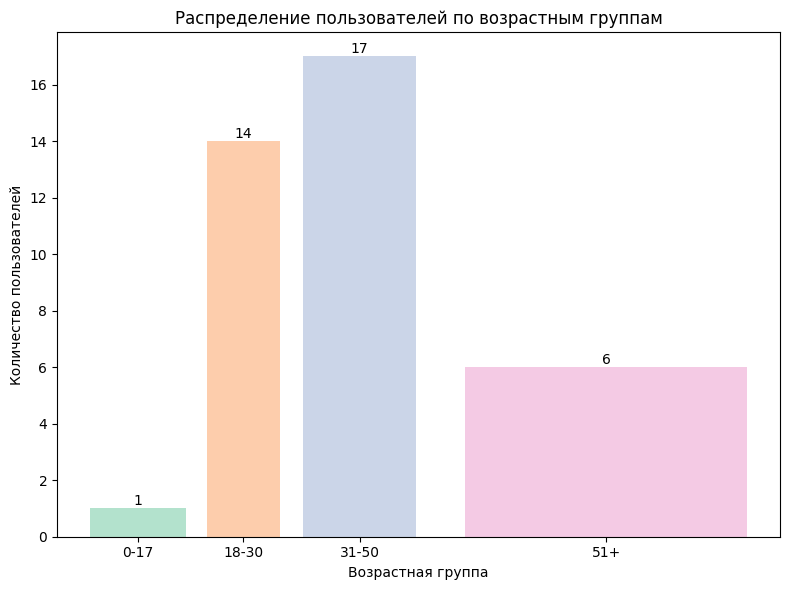

In [22]:
# Гистограмма

fig, ax = plt.subplots(  # создаем полотно
    figsize=(8, 6)  # размер полотна
)

_, _, patches = ax.hist(
    df["age"],  # данные берем из столбца с возрастом
    bins=bins,  # бины [0, 17, 30, 50, 100]
    rwidth=0.8  # столбцы с зазорами (для явного разделения возрастных групп)
)
ax.set_title("Распределение пользователей по возрастным группам")
ax.set_xlabel("Возрастная группа")
ax.set_ylabel("Количество пользователей")

# Добавим значения над столбцами
plt.bar_label(patches)
    
# Добавим подписи под столбцами
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]  # вычисляем центры бинов для правильных позиций меток
ax.set_xticks(bin_centers)  # ставим метки на bin_centers (в нашем случае [8.5, 23.5, 40.0, 75.0])
ax.set_xticklabels(labels)  # подписываем каждую метку с помощью labels

# Раскрасим каждый столбец
colors = plt.get_cmap('Pastel2')
for i, rect in enumerate(patches):
    rect.set_fc(colors(i))

plt.tight_layout()
plt.show() # отображаем полотна

# fig.savefig("figures/hist.png")

Данная визуализация наглядно демонстрирует уже сделанный вывод про возрастные группы.

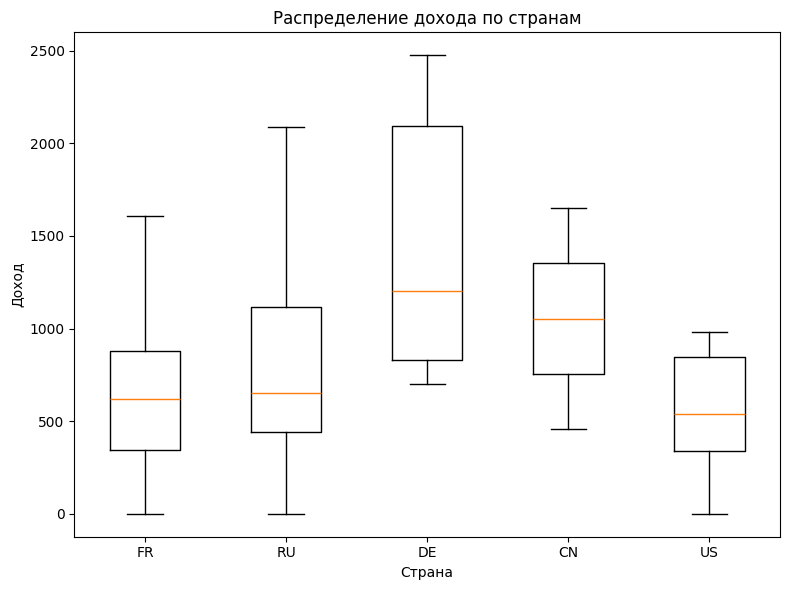

In [23]:
# Ящики с усами

countries = df["country"].dropna().unique()  # получим все присутствующие в записях страны (dropna() - за исключением пустых)

fig, ax = plt.subplots(
    figsize=(8, 6)
)

ax.boxplot(
    [df[df["country"] == country]["revenue"] for country in countries],  # для каждой страны берем данные о доходе
    tick_labels=countries
)
ax.set_title('Распределение дохода по странам')
ax.set_xlabel('Страна')
ax.set_ylabel('Доход')

plt.tight_layout()
plt.show()

# fig.savefig("figures/boxplot.png")

Ящики с усами - чрезвычайно информативный график. Сделаем несколько выводов по нему:

- Наибольший медианный доход наблюдается у Германии (`DE`). У других стран он заметно ниже, кроме Китая (`CN`), но value_counts уже показал, что у Китая всего 2 пользователя - мало данных.
- Заметные выбросы у России (`RU`) и Германии (`DE`). При этом у России небольшая медиана (`~600-650`). Можно предположить, что рынок поляризован, то есть много как высокодоходных, так и низкодоходных пользователей.
- Относительно остальных стран, в США (`US`) довольно небольшие выбросы, следовательно, стабильный рынок.

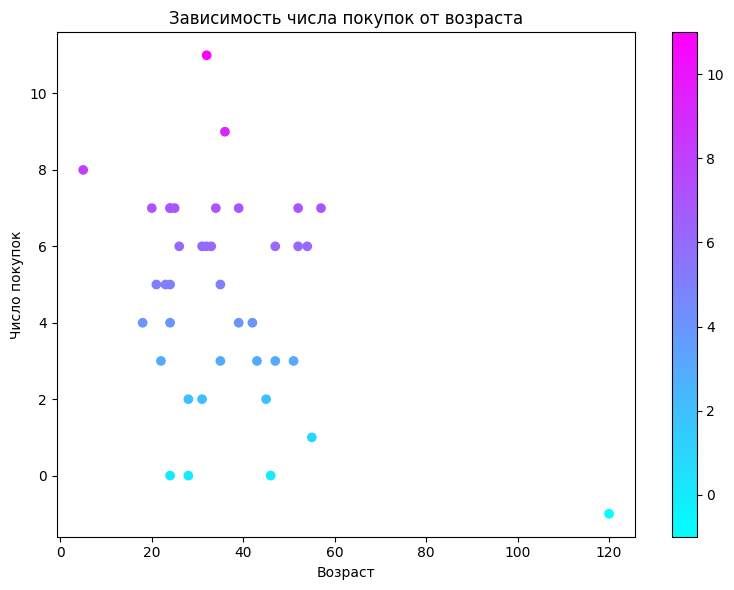

In [24]:
# Диграмма рассеяния

fig, ax = plt.subplots(
    figsize=(8, 6)
)

scatter = ax.scatter(
    x=df["age"],        # по оси X откладываем возраст
    y=df["purchases"],  # по оси Y - число покупок
    c=df["purchases"],  # цвет будем ранжировать по числу покупок
    cmap='cool'         # используем такой colormap
)
plt.colorbar(scatter, ax=ax)  # отображаем цветовую карту со шкалой значений
ax.set_title('Зависимость числа покупок от возраста')
ax.set_xlabel('Возраст')
ax.set_ylabel('Число покупок')

plt.tight_layout()
plt.show()

# fig.savefig("figures/scatter.png")

Диаграмма рассеяния очень хороша, чтобы ловить выбросы - в данном случае, пользователи с возрастом 5 и 120.